Because of their ease to create and their potential to be lucratice, mobile apps are being developed and released in great numbers. This analysis will be over 10,000 apps in the Google Play Store, detailed in  `app.csv` 

In [1]:
# Read in dataset
import pandas as pd
apps_with_duplicates = pd.read_csv('datasets/apps.csv')

# Drop duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of rows in the duplicate dataset = ', len(apps_with_duplicates))
print('Total number of apps in the dataset = ', len(apps))

# Print a concise summary of apps dataframe
print(apps.info())

# Have a look at a random sample of n rows
n = 5
apps.sample(n)

Total number of rows in the duplicate dataset =  9659
Total number of apps in the dataset =  9659
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
Unnamed: 0        9659 non-null int64
App               9659 non-null object
Category          9659 non-null object
Rating            8196 non-null float64
Reviews           9659 non-null int64
Size              8432 non-null float64
Installs          9659 non-null object
Type              9659 non-null object
Price             9659 non-null object
Content Rating    9659 non-null object
Genres            9659 non-null object
Last Updated      9659 non-null object
Current Ver       9651 non-null object
Android Ver       9657 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB
None


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1742,2239,Real Racing 3,FAMILY,4.5,354384,71.0,"10,000,000+",Free,0,Everyone,Racing;Action & Adventure,"July 2, 2018",6.4.0,4.1 and up
4720,5702,Avakin Life - 3D virtual world,FAMILY,4.4,1275373,91.0,"10,000,000+",Free,0,Teen,Role Playing,"July 3, 2018",1.021.10,4.1 and up
8858,10015,Pregnant Emergency Surgery,FAMILY,3.8,127229,34.0,"10,000,000+",Free,0,Everyone,Casual,"September 7, 2017",1.1.14,4.0 and up
2751,3485,MyVodafone (India) - Online Recharge & Pay Bills,PRODUCTIVITY,4.1,1092367,NaN,"10,000,000+",Free,0,Everyone,Productivity,"August 4, 2018",8.0.1.0,Varies with device
1926,2448,Dermatology Atlas (Colored & Illustrative),MEDICAL,5.0,3,20.0,100+,Free,0,Everyone,Medical,"July 19, 2018",1,4.1 and up


Although there are 13 features for each app, the focus of this analysis will be on `Installs`, `Price`, `Rating` and `Size`. From the output of .info above we can see that `Installs` and `Price` are non numberic types despite intuitiion. In order to analyze we will remore any pesky characters and convert to numeric dtype. 

In [2]:
# List of characters to remove
chars_to_remove = ['+', ",", "$"]
# List of column names to clean
cols_to_clean = ['Installs', 'Price']

# Loop for each column
for col in cols_to_clean:
    # Replace each character with an empty string
    for char in chars_to_remove:
        apps[col] = apps[col].astype(str).str.replace(char, '')
    # Convert col to numeric
    apps[col] = pd.to_numeric(apps[col]) 
    


With the vast marketplace that is the Google Play store it is important to make them esaily discoverable; to assist Google groups appss into categories. Let analyst to see which catefory has the highest share of apps, if there is any speciic categordominating the market and which categories what the fewest apps on the market. 

In [3]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them in descending order
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  33


Results shows that `Family` apps dominate the market with `Games` and `Tools` being the runners up, At the tail end is the  `Beauty` category with the least number of apps in the market. Now that we have a picture of the category breat down of the market places less analyze the distribution of ratings.

Average app rating =  4.173243045387998


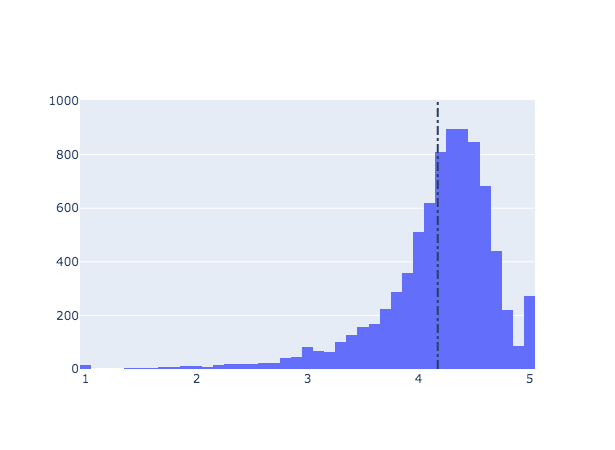

In [4]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

It can be seen from the plot that the histogram is skewed right which indicates that the majority of have ratings on the higher end with a few apps dragging out the tail. 

By analyzing some jointplots we can look into the relationships between `Size` and `Price` as well as `Rating` and `Price`.

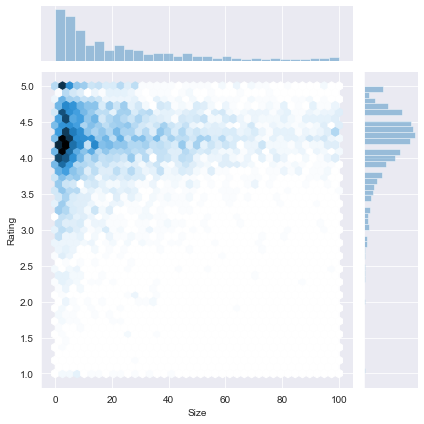

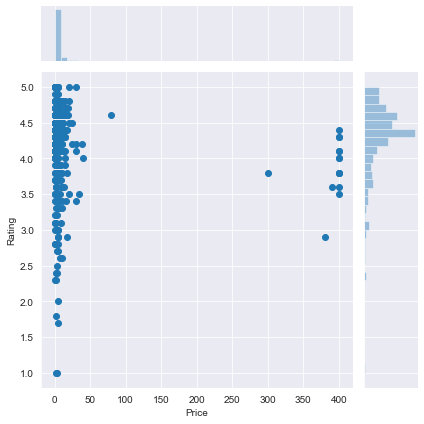

In [5]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Filter rows where both Rating and Size values are not null
apps_with_size_and_rating_present = apps[(~apps['Rating'].isnull()) & (~apps['Price'].isnull())]

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hex')

# Subset apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

From the plots above we can see the following: Most high rated apps have a size range between 2 and 20 MBs and a price below $10

There are many factors sto consider when it comes to pricing strategies for apps, and the factors can differ across categories. Below we examine pricing by catefory in a stripplot to get a better look at pricing distributions

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


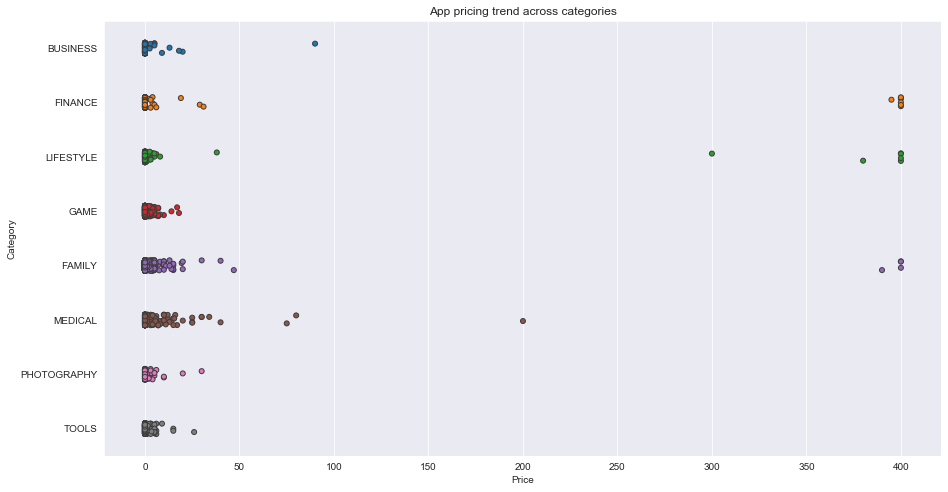

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
apps_above_200

The first thing that is brought to attention is these junk "I am rich" apps that cloud the view of pricing as they have no real funciton besides showing people how big of a douche you are. 

So below lets get rid of those apps and focus on apps with a purpose. 

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

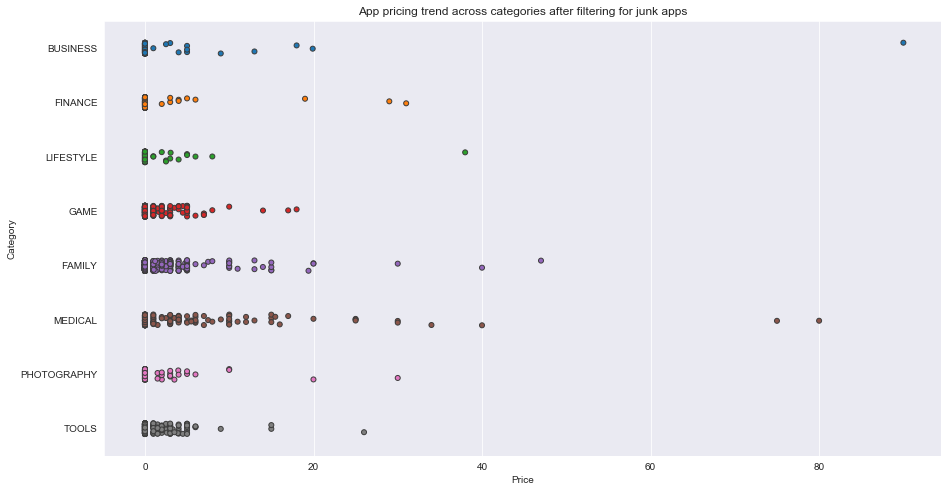

In [7]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price']<100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps
ax = sns.stripplot(x=apps_under_100['Price'], y=apps_under_100['Category'],
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

With the junk apps out of the way we can see that the `Family` apps are prices below 60. The highest prices apps fall in the `Business` and `Medicine` categories and probably have higher functionality or are more knowledged based. It can also be seen that all `Games` apps are prices below 20 which is understandable considering demographics and use.

Finally lets examine the popularity of Paid apps vs Free apps. THrough use of boxplots we will compare the number of downloads for both paid and free apps.

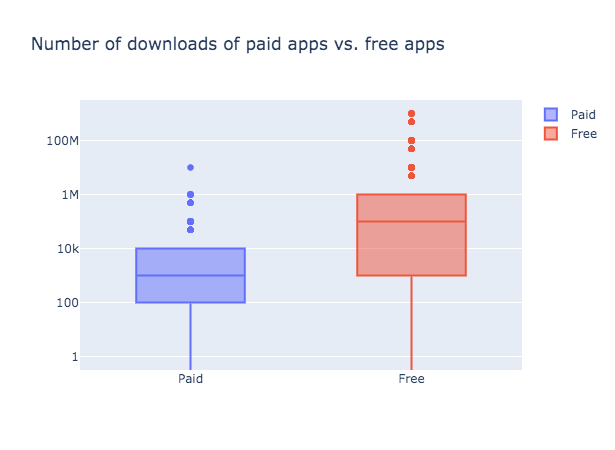

In [10]:
trace0 = go.Box(
    # Data for paid apps
    y=apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

Above we can see that paid apps have what looks to be a significantly fewer amount of downloads than free apps. This is understandable as app users are probably more hesitant to purchase apps they have not been able to use prior. 